In [26]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)

print(os.listdir(path))

#Carga de ambos datasets
test_df = pd.read_csv(path + "//test_energy_data.csv")
train_df = pd.read_csv(path + "//train_energy_data.csv")
if len(test_df) > 0 and len(train_df)>0:
    print("Cargados correctamente")
else:
    print("Problema al cargar los archivos")


Path to dataset files: C:\Users\Jorge\.cache\kagglehub\datasets\govindaramsriram\energy-consumption-dataset-linear-regression\versions\1
['test_energy_data.csv', 'train_energy_data.csv']
Cargados correctamente


In [27]:
#Vamos a utilizar solamente el train para entrenar el modelo.

#Copia del archivo

train_copy = train_df.copy()
test_copy = test_df.copy()

print(train_copy.head())
print(train_copy.describe())
print("Total de los datos", train_copy.shape)

  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  
       Square Footage  Number of Occupants  Appliances Used  \
count        1000.000          1000.000000      1000.000000   
mean        25462.388            48.372000        25.606000   
std         14294.554         

Queremos saber la energía consumida [Energy Consumption].  
Tenemos 1000 filas y 7 columnas.

In [28]:
# Vemos los tipos de los datos

print(train_copy.info())

#Valores únicos de los datos
def valores_unicos (dataset):
    columnas = dataset.columns
    for column in columnas:
        print("Columna: ")
        print(dataset[column].value_counts())
        print("--------------")
        
valores_unicos(train_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
None
Columna: 
Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64
--------------
Columna: 
Square Footage
39065    2
11289    2
25057    2
20316    2
21109    2
        ..
14419    1
12194    1
39562    1
8348     1
2470     1
Name: count, Length: 986, dtype: int64
--------------
Columna: 
Number of Occupants
21    27
60    20
32    1

In [29]:
#Transformo las columnas categóricas a numéricas (Building Type,Day of Week)

from sklearn.preprocessing import LabelEncoder

def transforma_categoricos_a_numericos(dataset):
    labelEncoder = LabelEncoder()
    columnasCategoricas = dataset.select_dtypes(include=['object']).columns  
    for column in columnasCategoricas:
        dataset[column] = labelEncoder.fit_transform(dataset[column])  
print("Antes de la transformación--------------------------")
print(train_copy.head(5))
print("Después de la transformación------------------------")
transforma_categoricos_a_numericos(train_copy)
print(train_copy.head(5))
    
transforma_categoricos_a_numericos(test_copy)


Antes de la transformación--------------------------
  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  
Después de la transformación------------------------
   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0              2            7063       

In [30]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = train_copy.corr()
corr_matrix["Energy Consumption"].sort_values(ascending=False)

Energy Consumption     1.000000
Square Footage         0.774873
Number of Occupants    0.354485
Appliances Used        0.312792
Day of Week           -0.004393
Average Temperature   -0.034487
Building Type         -0.202358
Name: Energy Consumption, dtype: float64

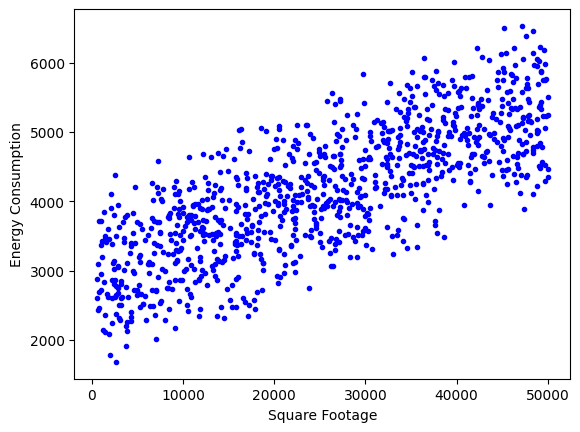

In [31]:
#Representación de los datos
import matplotlib.pyplot as plt 

plt.plot(train_copy['Square Footage'], train_copy['Energy Consumption'], "b.")
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.show()


# Creación del modelo



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
X = train_copy.drop(columns=['Energy Consumption'])  
y = train_copy['Energy Consumption']  
X_test = test_copy.drop(columns=['Energy Consumption'])
y_test = test_copy['Energy Consumption']

def escalar_los_datos(dataset):
    scaler = StandardScaler()
    dataset_scaled = scaler.fit_transform(dataset)
    return dataset_scaled
#Solo debo escalar las características
X = escalar_los_datos(X)
X_test = escalar_los_datos(X_test)

#Creo el modelo

model = LinearRegression()
model.fit(X,y)

#Theta 0 (donde se corta el eje y)
print("Lugar de corte de y: ",model.intercept_)
#Theta 1 (Inclinación de la línea en cada característica)
print("Inclinación de la línea: ", model.coef_)


Lugar de corte de y:  4166.25257
Inclinación de la línea:  [-210.17213965  726.42801703  299.83489146  287.14082968  -30.32876752
  -19.67363992]


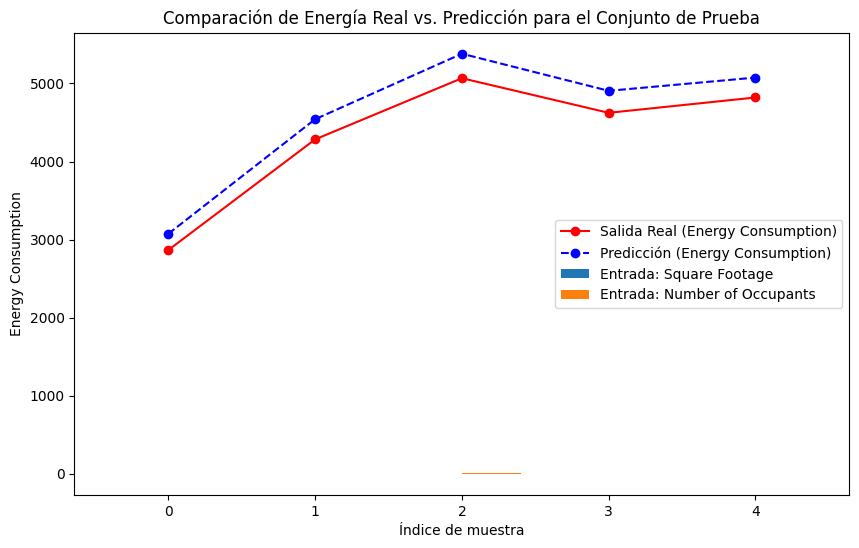

Entradas para predicción (primeras 5 muestras):
[[ 1.07466422 -0.09667837 -1.08315662 -1.62143335  0.9355237  -1.12815215]
 [-1.4245549   0.12469115  0.29473421 -0.28023903  0.14830117  0.88640526]
 [-1.4245549   1.42432084 -1.45283465  1.20213365  1.66352399 -1.12815215]
 [ 1.07466422  1.15398613  1.23573282 -0.70377408  0.77230142  0.88640526]
 [ 1.07466422  0.79444391  0.3619484   1.41390118 -0.7169214  -1.12815215]]

Salida esperada (Energy Consumption) para las primeras 5 muestras:
0    2865.57
1    4283.80
2    5067.83
3    4624.30
4    4820.59
Name: Energy Consumption, dtype: float64

Predicción del modelo para las primeras 5 muestras:
[3073.63192373 4542.20038815 5381.63424455 4906.24772651 5075.94612275]


In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Realizar la predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados
# Vamos a comparar las entradas y las salidas de forma visual.

# Crear un gráfico de barras comparando lo que entra (X_test), lo que se espera (y_test) y lo que predice el modelo (y_pred)
# Por simplicidad, vamos a visualizar algunas instancias (5 por ejemplo)

indices = np.arange(5)  # Solo vamos a mostrar 5 valores
fig, ax = plt.subplots(figsize=(10, 6))

# Mostrar las entradas (X_test) para las primeras 5 muestras
ax.bar(indices - 0.2, X_test[:5, 0], 0.4, label='Entrada: Square Footage')  # Ejemplo de la primera característica
ax.bar(indices + 0.2, X_test[:5, 1], 0.4, label='Entrada: Number of Occupants')  # Ejemplo de la segunda característica

# Graficar las salidas reales y las predicciones
ax.plot(indices, y_test[:5], marker='o', linestyle='-', color='r', label='Salida Real (Energy Consumption)')
ax.plot(indices, y_pred[:5], marker='o', linestyle='--', color='b', label='Predicción (Energy Consumption)')

# Añadir etiquetas y leyenda
ax.set_xlabel('Índice de muestra')
ax.set_ylabel('Energy Consumption')
ax.set_title('Comparación de Energía Real vs. Predicción para el Conjunto de Prueba')
ax.legend()

# Mostrar el gráfico
plt.show()

# También puedes mostrar las primeras entradas para verlas directamente
print("Entradas para predicción (primeras 5 muestras):")
print(X_test[:5])
print("\nSalida esperada (Energy Consumption) para las primeras 5 muestras:")
print(y_test[:5])
print("\nPredicción del modelo para las primeras 5 muestras:")
print(y_pred[:5])

In [39]:
#Evaluación del modelo

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizar la predicción sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación R²: {r2}")

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")


Error Cuadrático Medio (MSE): 131671.6428478254
Coeficiente de Determinación R²: 0.8081215800603041
Error Absoluto Medio (MAE): 333.67531587458564
